In [2]:
import numpy as np
import pandas as pd
import cv2

In [140]:
image=cv2.imread('image1.png')

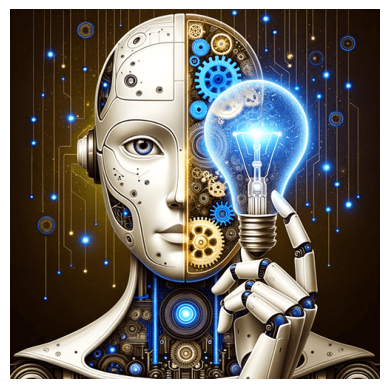

In [4]:
import matplotlib.pyplot as plt



# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()


In [5]:
R_channel=image[0]
G_channel=image[1]
B_channel=image[2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


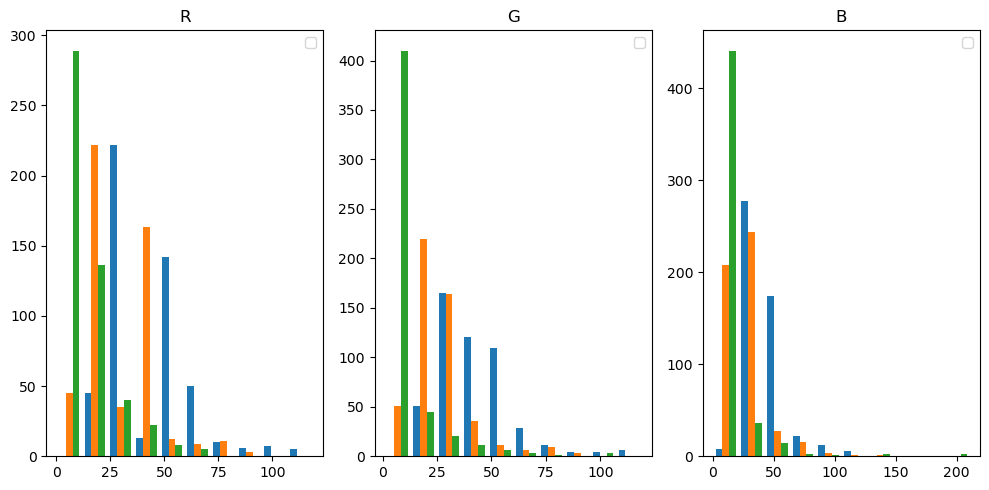

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Crear la figura
plt.figure(figsize=(10, 5))

# Subplot 1 (gráfico seno)
plt.subplot(1, 3, 1)  # 1 fila, 2 columnas, posición 1
plt.hist(R_channel)
plt.title('R')
plt.legend()

# Subplot 2 (gráfico coseno)
plt.subplot(1, 3, 2)  # 1 fila, 2 columnas, posición 2
plt.hist(G_channel)
plt.title('G')
plt.legend()


# Subplot 2 (gráfico coseno)
plt.subplot(1, 3, 3)  # 1 fila, 2 columnas, posición 2
plt.hist(B_channel)
plt.title('B')
plt.legend()

# Mostrar la figura con subplots
plt.tight_layout()  # Ajustar los subplots para que no se sobrepongan
plt.show()




<p>
 Move the mouse cursor within your image. For the current pixel location p in the image, compute and display

 <ul>


<li>the outer border (see grey box) of the 11 × 11 square window Wp around</li> 
pixel p in your image I (i.e., p is the reference point of this window),
<li>(above this window or in a separate command window) the location p (i.e.,
its coordinates) of the mouse cursor and the RGB values of your image I at
p,</li> 
<li>(below this window or in a separate command window) the intensity value
[R(p)+ G(p)+B(p)]/3 at p, and</li> 
<li>the mean μWp and standard deviation σWp .</li> 


 </ul>

</p>

In [7]:
import cv2
import numpy as np

# Listas para almacenar la información de los puntos
points_data = []

# Función para manejar los eventos del mouse
def mouse_callback(event, x, y, flags, param):
    img_copy = param.copy()
    
    # Definir los límites de la ventana 11x11 alrededor del cursor
    top_left_x = max(0, x - 5)
    top_left_y = max(0, y - 5)
    bottom_right_x = min(img_copy.shape[1] - 1, x + 5)
    bottom_right_y = min(img_copy.shape[0] - 1, y + 5)
    
    # Extraer la ventana 11x11
    window = img_copy[top_left_y:bottom_right_y+1, top_left_x:bottom_right_x+1]
    
    # Obtener los valores RGB del pixel actual
    pixel_rgb = img_copy[y, x]
    pixel_intensity = np.mean(pixel_rgb)
    
    # Calcular la media y desviación estándar en la ventana
    mean_window = np.mean(window, axis=(0, 1))
    std_window = np.std(window, axis=(0, 1))

    # Mostrar los valores RGB y la intensidad en la imagen
    text_rgb = f'Pos: ({x},{y}), RGB: {pixel_rgb.tolist()}'
    text_intensity = f'Intensidad: {pixel_intensity:.2f}'
    text_mean = f'Media: {mean_window.tolist()}'
    text_std = f'Desv. Est.: {std_window.tolist()}'
    
    # Mejorar el color de las letras: texto negro con borde blanco
    cv2.putText(img_copy, text_rgb, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    cv2.putText(img_copy, text_rgb, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    cv2.putText(img_copy, text_intensity, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    cv2.putText(img_copy, text_intensity, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    cv2.putText(img_copy, text_mean, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    cv2.putText(img_copy, text_mean, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    cv2.putText(img_copy, text_std, (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    cv2.putText(img_copy, text_std, (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

    # Mostrar el rectángulo 11x11 alrededor del punto del mouse
    cv2.rectangle(img_copy, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 1)
    
    # Mostrar la imagen con el rectángulo y la información
    cv2.imshow('Imagen', img_copy)

    # Almacenar la información al hacer clic
    if event == cv2.EVENT_LBUTTONDOWN:
        # Guardar la información del punto seleccionado
        point_info = {
            'position': (x, y),
            'rgb': pixel_rgb.tolist(),
            'intensity': pixel_intensity,
            'mean_window': mean_window.tolist(),
            'std_window': std_window.tolist(),
            'window': window.tolist()
        }
        points_data.append(point_info)
        print(f"Información guardada en el punto ({x}, {y}):")
        print(point_info)

# Cargar la imagen


# Crear una ventana de OpenCV
cv2.namedWindow('Imagen')

# Asignar la función de callback para el mouse
cv2.setMouseCallback('Imagen', mouse_callback, param=image)

# Mostrar la imagen hasta que el usuario presione una tecla
while True:
    cv2.imshow('Imagen', image)
    if cv2.waitKey(1) & 0xFF == 27:  # Presiona 'Esc' para salir
        break

cv2.destroyAllWindows()

# Guardar los datos en un archivo (opcional)
import json
with open('informacion_puntos.json', 'w') as file:
    json.dump(points_data, file, indent=4)

print("Información de los puntos guardada en 'informacion_puntos.json'.")




Información guardada en el punto (132, 273):
{'position': (132, 273), 'rgb': [128, 113, 89], 'intensity': 110.0, 'mean_window': [132.23140495867767, 113.49586776859505, 76.01652892561984], 'std_window': [30.684952117541954, 34.14870832762673, 48.85397087848919], 'window': [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [137, 113, 77], [149, 138, 121], [128, 113, 89], [125, 107, 79], [125, 107, 79], [125, 107, 79], [182, 167, 140], [227, 216, 195], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [162, 144, 113], [136, 119, 91], [125, 107, 79], [125, 107, 79], [125, 107, 79], [154, 137, 107], [238, 229, 211], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [154, 137, 107], [136, 119, 91], [128, 113, 89], [125, 107, 79], [125, 107, 79], [140, 127, 108], [220, 209, 187], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [154, 137, 107], [140,

In [8]:
import json

with open('informacion_puntos.json', 'r') as file:
    datos_puntos = json.load(file)

# Ejemplo: Mostrar la información del primer punto
print(datos_puntos[0])


{'position': [132, 273], 'rgb': [128, 113, 89], 'intensity': 110.0, 'mean_window': [132.23140495867767, 113.49586776859505, 76.01652892561984], 'std_window': [30.684952117541954, 34.14870832762673, 48.85397087848919], 'window': [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [137, 113, 77], [149, 138, 121], [128, 113, 89], [125, 107, 79], [125, 107, 79], [125, 107, 79], [182, 167, 140], [227, 216, 195], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [162, 144, 113], [136, 119, 91], [125, 107, 79], [125, 107, 79], [125, 107, 79], [154, 137, 107], [238, 229, 211], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [154, 137, 107], [136, 119, 91], [128, 113, 89], [125, 107, 79], [125, 107, 79], [140, 127, 108], [220, 209, 187], [0, 255, 0]], [[0, 255, 0], [96, 72, 8], [132, 100, 44], [154, 137, 107], [140, 127, 108], [128, 113, 89], [125, 107, 79], [

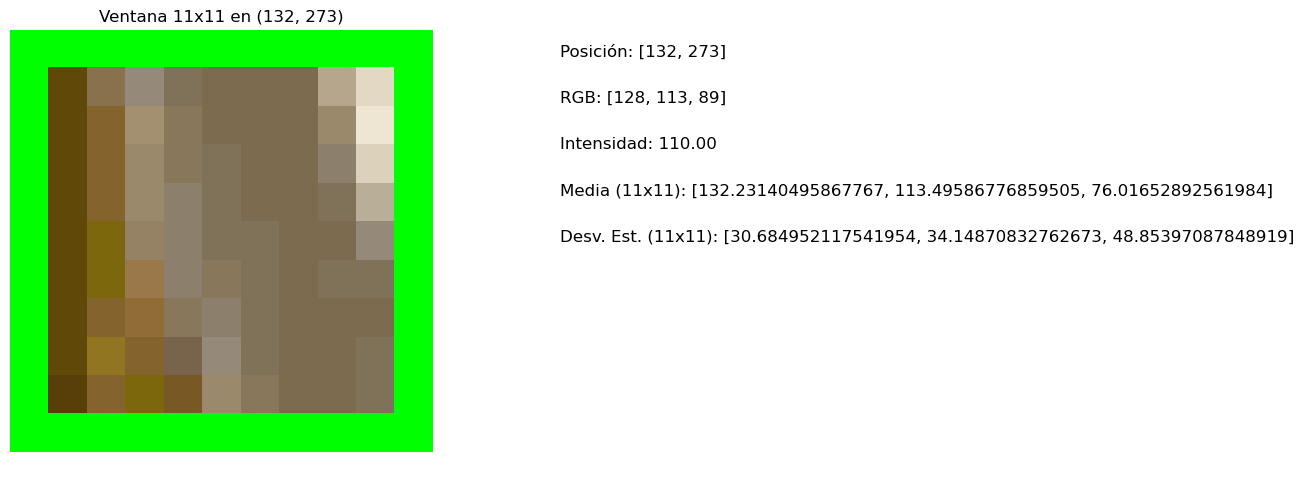

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar la posición seleccionada y su cuadrado 11x11
def plot_selected_point(point_data):
    """
    Grafica los datos de un punto seleccionado en la imagen, mostrando:
    - La posición y los valores RGB del punto.
    - La intensidad, media y desviación estándar del cuadrado 11x11.
    - Una imagen con el cuadrado 11x11 resaltado.
    
    Args:
        point_data (dict): Un diccionario con los datos del punto seleccionado. Debe contener:
            - 'position': coordenadas (x, y) del punto.
            - 'rgb': valores RGB del punto.
            - 'intensity': intensidad en el punto.
            - 'mean_window': media RGB de la ventana 11x11.
            - 'std_window': desviación estándar RGB de la ventana 11x11.
            - 'window': imagen de la ventana 11x11.
    """
    
    # Extraer la información del punto
    pos = point_data['position']
    rgb = point_data['rgb']
    intensity = point_data['intensity']
    mean_window = point_data['mean_window']
    std_window = point_data['std_window']
    window = np.array(point_data['window'], dtype=np.uint8)  # Convertir a un arreglo de numpy

    # Crear una figura con subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Mostrar la ventana 11x11 en el subplot izquierdo
    ax[0].imshow(window)
    ax[0].set_title(f'Ventana 11x11 en ({pos[0]}, {pos[1]})')
    ax[0].axis('off')

    # Mostrar la información del punto en el subplot derecho
    ax[1].text(0.1, 0.9, f'Posición: {pos}', fontsize=12, color='black')
    ax[1].text(0.1, 0.8, f'RGB: {rgb}', fontsize=12, color='black')
    ax[1].text(0.1, 0.7, f'Intensidad: {intensity:.2f}', fontsize=12, color='black')
    ax[1].text(0.1, 0.6, f'Media (11x11): {mean_window}', fontsize=12, color='black')
    ax[1].text(0.1, 0.5, f'Desv. Est. (11x11): {std_window}', fontsize=12, color='black')
    ax[1].axis('off')  # Ocultar los ejes en esta gráfica

    plt.show()

# Ejemplo de cómo usar la función con los datos guardados de un punto
import json

# Cargar los datos de puntos desde un archivo JSON
with open('informacion_puntos.json', 'r') as file:
    datos_puntos = json.load(file)

# Elegir el punto que se desea graficar (ejemplo: el primer punto)
plot_selected_point(datos_puntos[0])


<p>

Exercise 1.2 (DataMeasures on Image Sequences) Define three different data measures
Di (t), i = 1, 2, 3, for analysing image sequences. Your program should do the
following:
<ul>



<li>Read as input an image sequence (e.g. in VGA format) of at least 50 frames.
</li>
<li>Calculate your data measures Di (t), i = 1, 2, 3, for those frames.
</li>
<li>Normalize the obtained functions such that all have the same mean and the same
variance.
</li>
<li>4. Compare the normalized functions by using the L1-metric.
</li>

</ul>

Discuss the degree of structural similarity between your measures in dependence of
the chosen input sequence of images.


</p>

In [22]:

import cv2

# Ruta del archivo de video
video_path = 'video.mp4'

# Abrir el video
cap = cv2.VideoCapture(video_path)
cap.read()[1].shape

(576, 1024, 3)

In [41]:
frame_count = 0
frames = []

# Leer al menos 50 fotogramas
while frame_count < 50:
    ret, frame = cap.read()  # Leer cada fotograma
    if not ret:
        print("No se pueden leer más fotogramas o el video ha terminado")
        break
    
    # Redimensionar el frame si no está en formato VGA
    frame_resized = cv2.resize(frame, (640, 480))
    
    frames.append(frame_resized)
    frame_count += 1


frames[0].shape

(480, 640, 3)

In [59]:
frame[0]

array([[240, 226, 185],
       [240, 226, 185],
       [240, 226, 185],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [69]:
R=frame[:,:,0]
G=frame[:,:,1]
B=frame[:,:,2]

In [74]:
frame[:,:,0]

array([[240, 240, 240, ..., 255, 255, 255],
       [240, 240, 240, ..., 255, 255, 255],
       [240, 240, 240, ..., 255, 255, 255],
       ...,
       [160, 160, 160, ..., 171, 171, 171],
       [160, 160, 160, ..., 171, 171, 171],
       [160, 160, 160, ..., 171, 171, 171]], dtype=uint8)

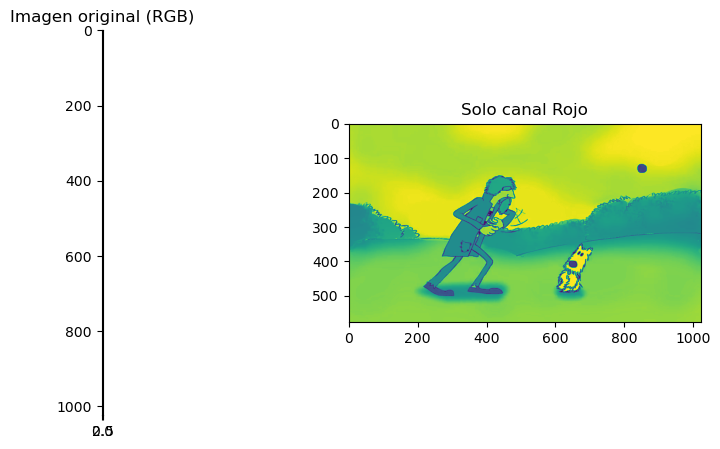

In [77]:
# Crear una imagen solo con el canal rojo (poniendo 0 en los otros canales)
red_image = np.zeros_like(frame[0])  # Crear una imagen de ceros con la misma forma que la original
red_image = G  # Mantener solo el canal rojo

# Graficar la imagen original y la imagen con solo el canal rojo
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(frame[0])
axs[0].set_title('Imagen original (RGB)')
axs[1].imshow(red_image)
axs[1].set_title('Solo canal Rojo')
plt.show()

El contraste de la ventana es: 5.65


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


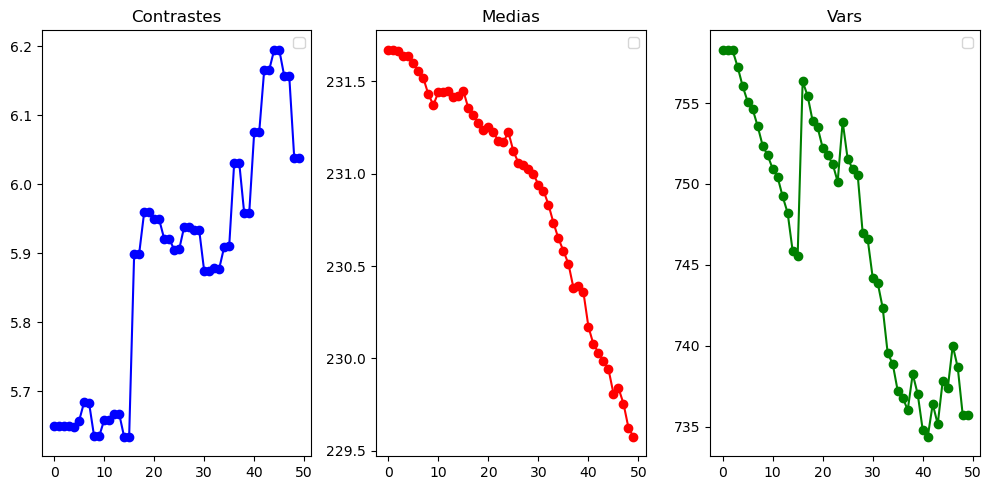

In [85]:
#Data Measures

## Contrast
import numpy as np

import numpy as np
import cv2

def calculate_contrast(image):
    # Convertimos a escala de grises si es una imagen RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    height, width = image.shape
    total_contrast = 0
    num_pixels = 0
    
    # Recorrer cada píxel excepto los bordes
    for x in range(1, height - 1):
        for y in range(1, width - 1):
            # Obtener la intensidad del píxel actual
            I_xy = image[x, y]
            
            # Extraer la vecindad de 3x3 alrededor del píxel (incluye el píxel mismo)
            neighborhood = image[x-1:x+2, y-1:y+2]
            
            # Excluir el píxel actual para calcular la media de los píxeles adyacentes
            adjacent_pixels = np.delete(neighborhood.flatten(), 4)
            mu_A = np.mean(adjacent_pixels)
            
            # Calcular la contribución al contraste para el píxel actual
            contrast = abs(I_xy - mu_A)
            total_contrast += contrast
            num_pixels += 1
    
    # Normalizar el contraste por el número de píxeles
    contrast_result = total_contrast / num_pixels
    return contrast_result

# Ejemplo de uso con una ventana de 11x11 extraída de una imagen
  # Ejemplo: una ventana 11x11 de valores aleatorios (intensidades)
contraste = calculate_contrast(frame[0])
print(f"El contraste de la ventana es: {contraste:.2f}")
contrastes=[]
for image in range(0,50):
    images=frame[image]
    contraste=calculate_contrast(images)
    contrastes.append(contraste)
    
    
  
    

## Mean



def calculate_mean(window):
        # Convertir la ventana a escala de grises si la imagen es RGB
    if window.ndim == 3:  # Si es una imagen con 3 canales (RGB)
        window = np.mean(window, axis=2)  # Calcular la intensidad promedio en cada pixel

    # Calcular la media de la intensidad en la ventana
    mean_intensity = np.mean(window)

    
    return mean_intensity

means=[]
for image in range(0,50):
    images=frame[image]
    mean=calculate_mean(images)
    means.append(mean)


## Variance

def calculate_var(window):
    
    # Convertir la ventana a escala de grises si la imagen es RGB
    if window.ndim == 3:  # Si es una imagen con 3 canales (RGB)
        window = np.mean(window, axis=2)  # Calcular la intensidad promedio en cada pixel

    # Calcular la media de la intensidad en la ventana
    mean_intensity = np.mean(window)

    # Calcular el contraste según la fórmula
    var= np.mean((window - mean_intensity)**2)

    return var

vars=[]
for image in range(0,50):
    images=frame[image]
    var=calculate_var(images)
    vars.append(var)




# Crear la figura
plt.figure(figsize=(10, 5))

# Subplot 1 (gráfico seno)
plt.subplot(1, 3, 1)  # 1 fila, 2 columnas, posición 1
plt.plot(contrastes, marker='o', linestyle='-', color='b')
plt.title('Contrastes')
plt.legend()

# Subplot 2 (gráfico coseno)
plt.subplot(1, 3, 2)  # 1 fila, 2 columnas, posición 2
plt.plot(means, marker='o', linestyle='-', color='r')
plt.title('Medias')
plt.legend()


# Subplot 2 (gráfico coseno)
plt.subplot(1, 3, 3)  # 1 fila, 2 columnas, posición 2
plt.plot(vars, marker='o', linestyle='-', color='g')
plt.title('Vars')
plt.legend()

# Mostrar la figura con subplots
plt.tight_layout()  # Ajustar los subplots para que no se sobrepongan
plt.show()




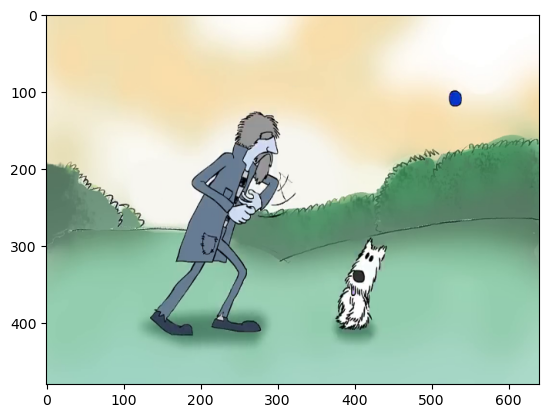

In [43]:
plt.imshow(frames[49])

In [89]:

    
    # Crear un array 2D
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr_2d)
# Output:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [99]:
print(arr_2d[0:3, 1:3])

[[2 3]
 [5 6]
 [8 9]]


In [103]:
# Crear un array 3D (ejemplo: 2 imágenes de 2x2 píxeles con 3 canales de color)
arr_3d = np.array([[[255, 0, 0], [0, 255, 0]], 
                   [[0, 0, 255], [255, 255, 0]]])

print(arr_3d.shape)
# Output:
# [[[255   0   0]
#   [  0 255   0]]
#
#  [[  0   0 255]
#   [255 255   0]]]


(2, 2, 3)


In [131]:
print(arr_3d[0, :, :]) #Controla que canal quieres ver
print(arr_3d[0])#contrla el canal que quieres ve


print(arr_3d[0, 0, 0])  # controlas el canal, la fila y la columna especifica, el resultado es un escalar

print(arr_3d[0, 1, :])  #controlas canal , la fila, el resultado es un vector. para este 
#ejemplo se tomó el canal 1 y la fila 1, por lo que el resultado es [0 255 0]

print(arr_3d[1, :, :]) #contola el canal, se accede al canal 2


[[255   0   0]
 [  0 255   0]]
[[255   0   0]
 [  0 255   0]]
255
[  0 255   0]
[[  0   0 255]
 [255 255   0]]


In [106]:
print(arr_3d)


[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255   0]]]


In [133]:
# Acceder a todos los valores del canal rojo de todas las imágenes
print(arr_3d[:, :,1])#[:,:,column_control:column_control] 

#o [:,:,column_control] toma la columna seleccionada en ambos canales de manera transpuesta
#ejemplo [:,:,0] envia la columna 0 del canal 1 y la columna 0 del canal 2
# [:,:,1] la columna 1 del canal 1 y la columna 1 del canal 2
#[:,:,2] la columna 2 del canal 1 y la columna 2 del canal 2, 
## RECORDAR; ESTAN TRANSPUESTAS.


[[  0 255]
 [  0 255]]


In [136]:
l1_distance = np.sum(np.abs(np.array(contrastes) - np.array(means)))
l1_distance

288959.7203776041

In [137]:
l1_distance = np.sum(np.abs(np.array(vars) - np.array(means)))
l1_distance

25785.25241586897

In [138]:
l1_distance = np.sum(np.abs(np.array(contrastes) - np.array(vars)))
l1_distance

263174.4679617352

<p>

Exercise 1.3 (Different Impacts of Amplitudes and Phase in Frequency Space on
Resulting Filtered Images) It is assumed that you have access to FFT programs for
the 2D DFT and inverse 2D DFT. The task is to study the problem of evaluating
information contained in amplitude and phase of the Fourier transforms:

<ul>
<li>

1. Transform images of identical size into the frequency domain. Map the resulting
complex numbers into amplitudes and phases. Use the amplitudes of one image
and the phases of the other image, and transform the resulting array of complex
numbers back into the spatial domain. Who is “winning”, i.e. can you see the
image contributing the amplitude or the image contributing the phase?


</li>






<li>

2. Select scalar images showing some type of homogeneous textures; transform
these into the frequency domain and modify either the amplitude or the phase of
the Fourier transform in a uniform way (for all frequencies), before transforming
back into the spatial domain. Which modification causes a more significant
change in the image?



</li>


<li>


3. Do the same operations and tests for a set of images showing faces of human
beings.

</li>

</ul>

</p>

In [ ]:
from scipy.fft import fft, ifft

In [139]:
image

49

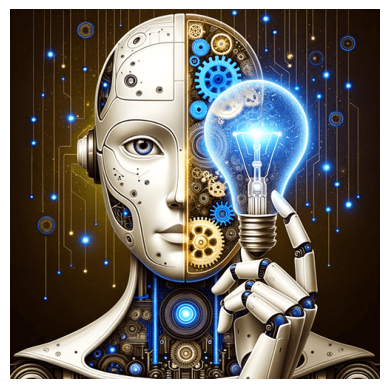

In [160]:
image=cv2.imread('image1.png')
import matplotlib.pyplot as plt



# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()


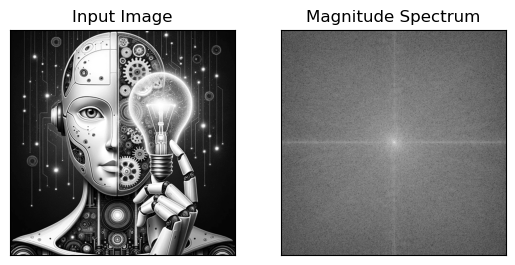

In [161]:
# del dominimo espacial al dominio de frecuencias
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f=np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [162]:
f

array([[22787624.              +0.j        ,
        -7893692.9877196  +242993.39883815j,
        -2033202.09109975 +696638.85927287j, ...,
         1200771.39323317+1555811.24586822j,
        -2033202.09109975 -696638.85927287j,
        -7893692.9877196  -242993.39883815j],
       [-1593170.93503938-2601948.96160248j,
          331406.15368689+1144540.22895414j,
         1287749.39743164 -745351.81418331j, ...,
         -527141.06319626 -923835.09339103j,
         -731554.34284757 +119199.45247297j,
         2140258.03986733+2063464.66719148j],
       [ -467566.56466568+1301572.69351537j,
          161534.73264443 -301555.44732138j,
         1809164.25551553-1139162.42331058j, ...,
          362135.36709259  -31060.27896509j,
         -680394.06348976-1777014.7486929j ,
         1389936.54908978+1932867.20236723j],
       ...,
       [ -200012.29458599 -842349.31863026j,
          373140.74388722  -34690.00598452j,
         -347262.74724933 -356164.38525795j, ...,
         -910590.282

In [ ]:
#Amplitud norma 2 de el vector

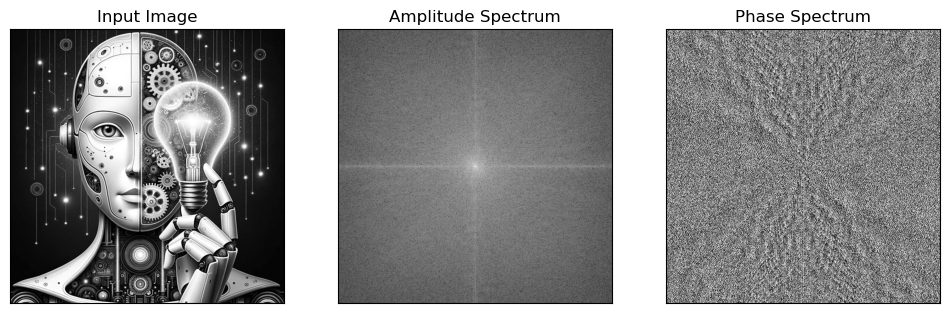

In [163]:
# Calcular la amplitud (magnitude) y la fase (phase)
amplitude_spectrum = np.abs(fshift)
phase_spectrum = np.angle(fshift)

# Visualizar la imagen original, la amplitud y la fase
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(np.log(amplitude_spectrum + 1), cmap='gray')
plt.title('Amplitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

In [155]:
image.shape

(500, 500)

In [154]:
fshift.shape

(500, 500)

250 250
[[-2214.        -2.44426701e-12j   363.80882377-1.92260739e+03j
     74.44719742+1.54633433e+02j ...   769.37710692-6.18170096e+02j
     74.44719742-1.54633433e+02j   363.80882377+1.92260739e+03j]
 [  306.21220293-1.05830797e+03j  -381.22694754+5.93840175e+02j
   -829.6734398 +2.23268395e+02j ...  1496.42638174-1.11496042e+03j
  -1694.38268709+1.33152536e+03j  -213.66194118+1.00136176e+03j]
 [ 1415.18881886-1.42720179e+03j  1270.28486846+1.57674539e+03j
  -1668.01789107+1.15236030e+02j ...  -952.15657308+1.41090177e+02j
     34.60913788+7.93058429e+02j  -152.34923745-1.71967031e+01j]
 ...
 [  824.23179843+8.65224470e+02j  -680.05400021-1.56572212e+03j
    764.48427607+1.16494623e+03j ...   608.95701502+7.56397704e+02j
   -511.75436338-3.50406597e+02j   677.25798198-1.85279810e+03j]
 [ 1415.18881886+1.42720179e+03j  -152.34923745+1.71967031e+01j
     34.60913788-7.93058429e+02j ...  -917.68146009+3.23443280e+02j
  -1668.01789107-1.15236030e+02j  1270.28486846-1.57674539e+03j]
 [

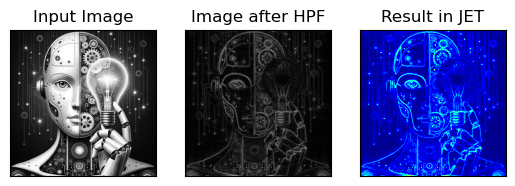

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que 'image' es una imagen 2D previamente definida en escala de grises
rows, cols = image.shape

# Calcular las coordenadas del centro y convertirlas en enteros
crow, ccol = int(rows / 2), int(cols / 2)
print(crow,ccol)
# Aplicar la operación de filtrado
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0 #[220:280,220:280] 60x60 rectangle in 500x500 image.
print(fshift)
# Deshacer el shift y aplicar la IFFT
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Visualizar los resultados
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_back, cmap='jet')
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()
